In [1]:
from sentence_transformers import SentenceTransformer, util

/Users/eliastakala/opt/anaconda3/envs/nlp/lib/python3.12/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [7]:
model = SentenceTransformer('all-mpnet-base-v2') #max input length 512 output dimension 384

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('translated_course_data_V2.csv')


In [8]:
df['embedding'] = df["course_description_en"].apply(lambda x: model.encode(x.replace("\n", " ")))

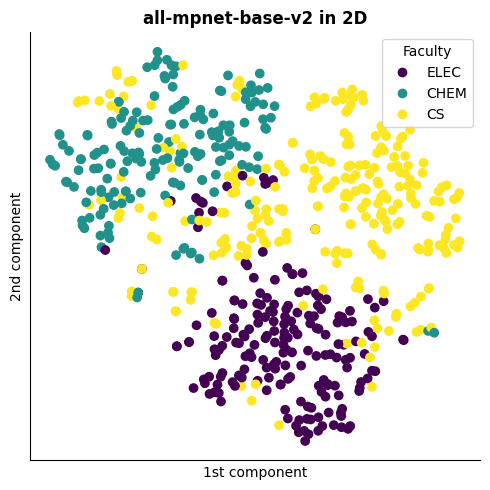

In [9]:
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df["embedding"] = df["embedding"].apply(lambda x: np.array(x))

# Keep the top 3 faculties
X = df.embedding
faculty = df["course_code"].str.split("-", expand=True)[0]
top_faculties = faculty.value_counts().index[:3]
mask = faculty.isin(top_faculties)
X_masked = np.stack(X[mask].to_numpy())

reduced = TSNE(
    n_components=2,
    perplexity=40,
    n_iter=5000,
).fit_transform(X_masked)

# Faculty labels
_, faculty_labels = np.unique(faculty[mask].values, return_inverse=True)


# Plot
fig, ax = plt.subplots(figsize=(5, 5))
scatter = ax.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=faculty_labels,
)

# Legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    top_faculties,
    title="Faculty",
)

sns.despine()
ax.grid(alpha=0.2)
ax.set_axisbelow(True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("all-mpnet-base-v2 in 2D", fontweight="bold")
ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")

fig.tight_layout()
plt.show()

In [10]:
model2 = SentenceTransformer('multi-qa-mpnet-base-dot-v1') #max input length 512 output dimension 768

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [11]:
df2 = pd.read_csv('translated_course_data_V2.csv')

In [13]:
df2['embedding'] = df["course_description_en"].apply(lambda x: model2.encode(x.replace("\n", " ")))

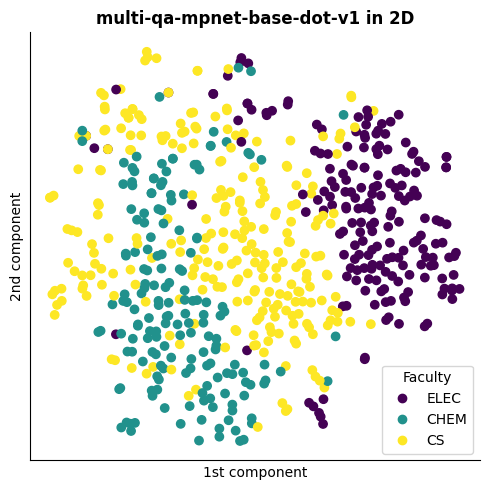

In [14]:
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

df2["embedding"] = df2["embedding"].apply(lambda x: np.array(x))

# Keep the top 3 faculties
X = df2.embedding
faculty = df2["course_code"].str.split("-", expand=True)[0]
top_faculties = faculty.value_counts().index[:3]
mask = faculty.isin(top_faculties)
X_masked = np.stack(X[mask].to_numpy())

reduced = TSNE(
    n_components=2,
    perplexity=40,
    n_iter=5000,
).fit_transform(X_masked)

# Faculty labels
_, faculty_labels = np.unique(faculty[mask].values, return_inverse=True)


# Plot
fig, ax = plt.subplots(figsize=(5, 5))
scatter = ax.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=faculty_labels,
)

# Legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    top_faculties,
    title="Faculty",
)

sns.despine()
ax.grid(alpha=0.2)
ax.set_axisbelow(True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("multi-qa-mpnet-base-dot-v1 in 2D", fontweight="bold")
ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")

fig.tight_layout()
plt.show()